### Python Genomic Selection functions
#### Miguel Perez-Enciso (miguel.perez@uab.es)
A simple set of functions to illustrate genomic prediction in python

#### NOTE: The functions correct only for the mean, i.e., the phenotypes must be precorrected

#### Inputs are:
        
- a nsnp x nind genotype file coded as 0, 1, 2 for each genotype.
- a pedigree and phenotypes file, with inds coded as integers 1,2.. nind, 
0 for unknwon parents, followed by phenotype values:

           id   id_father   id_mother   y1   y2 ...


In [2]:
# generic modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# specific modules
import gselection as gs

#--> folders
cdir = os.getcwd()
# input file dir
ddir= cdir + '/toy/'
# pedigree and phenotype file
pedfile = ddir + '/toy.pedy'

# genotypes file 
xfile = ddir + 'toy.gen'

# set Tranpose=True if nind x nsnp matrix
Transpose = False
# ploidy
ploidy = 2

In [26]:
# STEP 1: uploads genotypes
X = np.array(pd.read_csv(xfile, header=None, comment='#', sep='\s+'),dtype=float)
nind = X.shape[1]
print('N markers read: ' + str(X.shape[0]))
print('N inds read: ' + str(nind))
print('If you have a nind x nsnp matrix, set Transpose to True')
print('X is:\n',X)

if Transpose is True: X = X.T

N markers read: 10
N inds read: 8
If you have a nind x nsnp matrix, set Transpose to True
X is:
 [[0. 0. 0. 1. 1. 1. 0. 2.]
 [0. 0. 0. 1. 1. 1. 0. 2.]
 [1. 2. 0. 1. 1. 1. 0. 2.]
 [0. 2. 2. 1. 1. 1. 2. 2.]
 [0. 2. 0. 2. 1. 1. 0. 2.]
 [0. 0. 1. 0. 1. 1. 0. 2.]
 [2. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 2. 0. 1. 1. 2. 2.]
 [1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 2.]]


In [27]:
# STEP 2: uploads pedigree and phenotypes
ped = np.array(pd.read_csv(pedfile, header=None, comment='#', sep='\s+'))
y = ped[:,3:]
ped = np.array(ped[:,:3], int)
ntrait = y.shape[1]
print('N inds read: ' + str(X.shape[0]))
print('N traits read: ' + str(ntrait))
print('ped is:\n',ped)
print('\ny is:\n',y)

N inds read: 10
N traits read: 1
ped is:
 [[1 0 0]
 [2 0 0]
 [3 0 0]
 [4 0 0]
 [5 4 3]
 [6 4 3]
 [7 2 1]
 [8 4 1]]

y is:
 [[2.3]
 [3.4]
 [3.5]
 [4.3]
 [1.3]
 [1.1]
 [2.7]
 [2.9]]


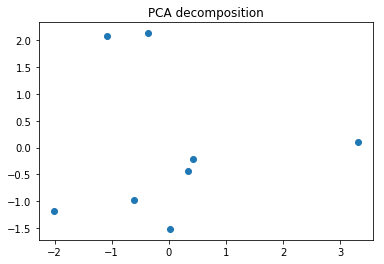

In [5]:
# STEP 3: PCA plot
pca = gs.Pca(X)
pca.fit()
pca.plot()

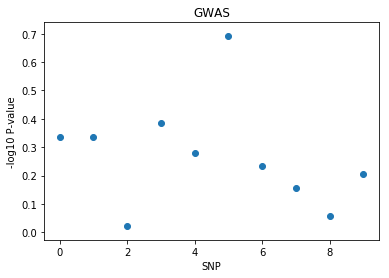

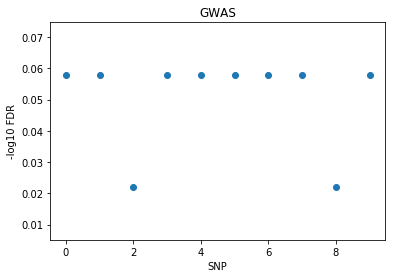

#SNP COEFF SE PVALUE FDR
1 -0.7416666666666668 0.9300462951440164 0.4613637093663693 0.8754395547701918
2 -0.7416666666666668 0.9300462951440164 0.4613637093663693 0.8754395547701918
3 -0.05000000000000016 0.764525996941896 0.9503898759973927 0.9503898759973927
4 0.5791666666666667 0.6483927779089187 0.4126553441444354 0.8754395547701918
5 0.38235294117647056 0.5611407067158505 0.5259009634930365 0.8754395547701918
6 -1.2083333333333335 0.8264297375525103 0.20356361216204283 0.8754395547701918
7 -0.4350000000000002 0.7396992632144499 0.5820376513858482 0.8754395547701918
8 -0.2352941176470587 0.5771004961867231 0.7003516438161534 0.8754395547701918
9 -0.15833333333333352 0.9848787291393348 0.8785726108213591 0.9503898759973927
10 -0.55 1.053328059058525 0.6238619184502217 0.8754395547701918


In [16]:
# STEP 4: GWAS plot for first trait
# trait to be analyzed
itrait = 0
# individuals without missing phenotypes (here all but last )
yids = np.arange(nind-1, dtype=int)
gwas = gs.GWAS(X=X[:,yids])
gwas.fit(y=y[yids,itrait])
gwas.plot() # pvalue
gwas.plot(fdr=True) # FDR
gwas.print() # prints gwas results

In [5]:
# STEP 5: Obtain inverse NRM (w/o inbreeding)
AI = gs.doAInverse(ped)
print(AI)

[[ 2.   0.5  0.   0.5  0.   0.  -1.  -1. ]
 [ 0.5  1.5  0.   0.   0.   0.  -1.   0. ]
 [ 0.   0.   2.   1.  -1.  -1.   0.   0. ]
 [ 0.5  0.   1.   2.5 -1.  -1.   0.  -1. ]
 [ 0.   0.  -1.  -1.   2.   0.   0.   0. ]
 [ 0.   0.  -1.  -1.   0.   2.   0.   0. ]
 [-1.  -1.   0.   0.   0.   0.   2.   0. ]
 [-1.   0.   0.  -1.   0.   0.   0.   2. ]]


In [6]:
# Actually, the quickest way to obtain NRM could be by inverting the inverse
from numpy.linalg import inv
A = inv(AI)
print('Check A is inverse: AI x A =')
# @ is shorthand for matrix multiplication
print(A @ AI)

Check A is inverse: AI x A =
[[ 1.00000000e+00 -1.11022302e-16 -1.94253862e-17  0.00000000e+00
   2.14299067e-18  3.24218004e-17  2.22044605e-16 -1.11022302e-16]
 [-6.05576195e-17  1.00000000e+00  6.47512874e-18  6.32042588e-18
  -7.14330225e-19 -1.08072668e-17  2.22044605e-16  3.92524916e-17]
 [ 1.52286962e-17  1.40001855e-18  1.00000000e+00  1.11022302e-16
  -2.22044605e-16 -1.11022302e-16 -2.80003711e-18 -9.21911840e-18]
 [ 0.00000000e+00  1.30540964e-17 -5.55111512e-17  1.00000000e+00
   0.00000000e+00 -1.11022302e-16 -2.61081927e-17  0.00000000e+00]
 [ 2.77555756e-17  4.75190324e-18 -1.66533454e-16 -2.77555756e-16
   1.00000000e+00 -1.11022302e-16 -9.50380647e-18  0.00000000e+00]
 [ 2.77555756e-17  1.11022302e-17  0.00000000e+00 -1.11022302e-16
  -1.11022302e-16  1.00000000e+00 -2.22044605e-17  0.00000000e+00]
 [-5.55111512e-17 -2.22044605e-16  3.85185989e-34  0.00000000e+00
   0.00000000e+00 -2.64815367e-34  1.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16 -4.99600361e-17 -5.551

In [17]:
# STEP 6: Predicting Breeding Values for first trait
itrait = 0
h2 = 0.3    # assumed h2

# BLUP evaluation when last individual has no phenotypes
# yids contains order of phenotyped individuals (0 is first individual)
# phenotyped individuals (all but last 1)
yids = np.arange(nind-1, dtype=int)
ebv_blup1 = gs.doEbv0(criterion='blup', X=X, y=y[:,itrait], yIds=yids, h2=h2, ped=ped)

# GBLUP, all individuals phenotyped
ebv_gblup = gs.doEbv0(criterion='gblup', X=X, y=y[:,itrait], h2=h2, nh=ploidy)

# Single Step evaluation assuming only last half of population is genotyped 
#    and all inds phenotyped but last one
# mkrids contains order of genotyped individuals
mkrids = np.arange(nind//2,nind, dtype=np.int)
Xss = X[:,mkrids]
ebv_sstep05 = gs.doEbv0(criterion='sstep', X=Xss, y=y[:,itrait],  
                        yIds=yids, mkrIds=mkrids, h2=h2, nh=ploidy, ped=ped)


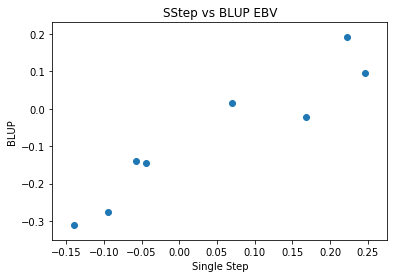

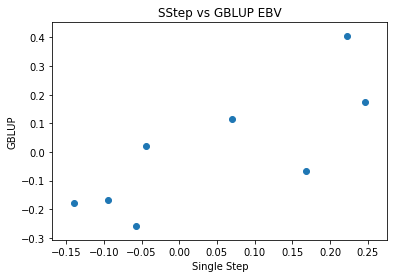

In [18]:
# Some plots
# plots
plt.scatter(ebv_sstep05, ebv_blup1)
plt.title('SStep vs BLUP EBV')
plt.xlabel('Single Step')
plt.ylabel('BLUP')
plt.show()
plt.close()

# plots
plt.scatter(ebv_sstep05, ebv_gblup)
plt.title('SStep vs GBLUP EBV')
plt.xlabel('Single Step')
plt.ylabel('GBLUP')
plt.show()
plt.close()
